<a href="https://colab.research.google.com/github/Chaitanya0604/SmartKnower-Major-Project--Sentimental-Analysis-On-Wine-Review-Dataset/blob/main/Deployment_Of_Sentimental_Analysis_On_Wine_Review_Dataset_using_Streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deployment Of Sentimental Analysis On Wine Review Dataset using Streamlit**

In [ ]:
!pip install streamlit

     |████████████████████████████████| 7.4MB 7.1MB/s 
     |████████████████████████████████| 4.4MB 41.7MB/s 
     |████████████████████████████████| 6.7MB 43.4MB/s 
     |████████████████████████████████| 112kB 35.7MB/s 
     |████████████████████████████████| 102kB 8.5MB/s 
     |████████████████████████████████| 163kB 48.1MB/s 
     |████████████████████████████████| 133kB 52.5MB/s 
     |████████████████████████████████| 122kB 49.2MB/s 
     |████████████████████████████████| 133kB 49.3MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
     |████████████████████████████████| 71kB 6.9MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13450 sha256=42eaf06336247692b4121c82539508130512a3dae668f97f33fdfee2b9b96e7b
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
  Created wheel for watchdog: filename=watchdog-0.10.3-cp36-none-any.whl size=73873 sha256=ac3266ba8640cb3d03c984d925cd90ba8dbdf14da

In [ ]:
%%writefile app1.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

df = pd.read_csv('/content/drive/My Drive/SmartknowerML/Machine Learning/wine first 150k.csv') 
df.rename(columns={'Unnamed: 0':'UniqueID'},inplace=True)
df.dropna(axis=0, inplace=True)
df.drop(['UniqueID', 'country',  'designation', 
       'price', 'province', 'region_1', 'region_2', 
        'variety', 'winery'],axis =1,inplace=True)
def partition(x):
  if x >=92:
    return('Positive')
  elif x>=86 and x<92:
    return('Neutral')
  else:
      return('Negative')

score_upd=df['points']

t=score_upd.map(partition)
df['points']=t
df=df[df['points']!='Neutral']

x = df.iloc[:,0].values #Description[Review Text] column as input
y = df.iloc[:,1].values #Points column as output


st.title("Wine Review Classifier")
st.subheader('TFIFD Vectorizer')
st.write('This project is based on Naive Bayes Classifier')


text_model = Pipeline([('tfidf',TfidfVectorizer()),('model',MultinomialNB())])
text_model.fit(x,y)
message = st.text_area("Please enter your Review Text","Type Here ..")
op = text_model.predict([message])
if st.button("Predict"):
  st.title(op)

Writing app1.py


In [ ]:
!pip install pyngrok

  Created wheel for pyngrok: filename=pyngrok-4.2.2-cp36-none-any.whl size=18025 sha256=2ffe29876875123dccdb7d26652e17b58312b7a74b3bf116af4447fffe44bf1c
  Stored in directory: /root/.cache/pip/wheels/9c/d3/b5/502fbef4b2782a6142bc00c62ccde76ee04c9148fb43b1b2cd
Successfully built pyngrok


In [ ]:
from pyngrok import ngrok
url = ngrok.connect(port='8501')
url

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Support for "return_ngrok_tunnel" as "False" is deprecated and will be removed in 5.0.0, when this method will return a NgrokTunnel instead of a str
  


'http://144b532869cd.ngrok.io'

In [ ]:
!streamlit run app1.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.204.84.54:8501

2020-10-22 15:54:50.687 NumExpr defaulting to 2 threads.
  Stopping...


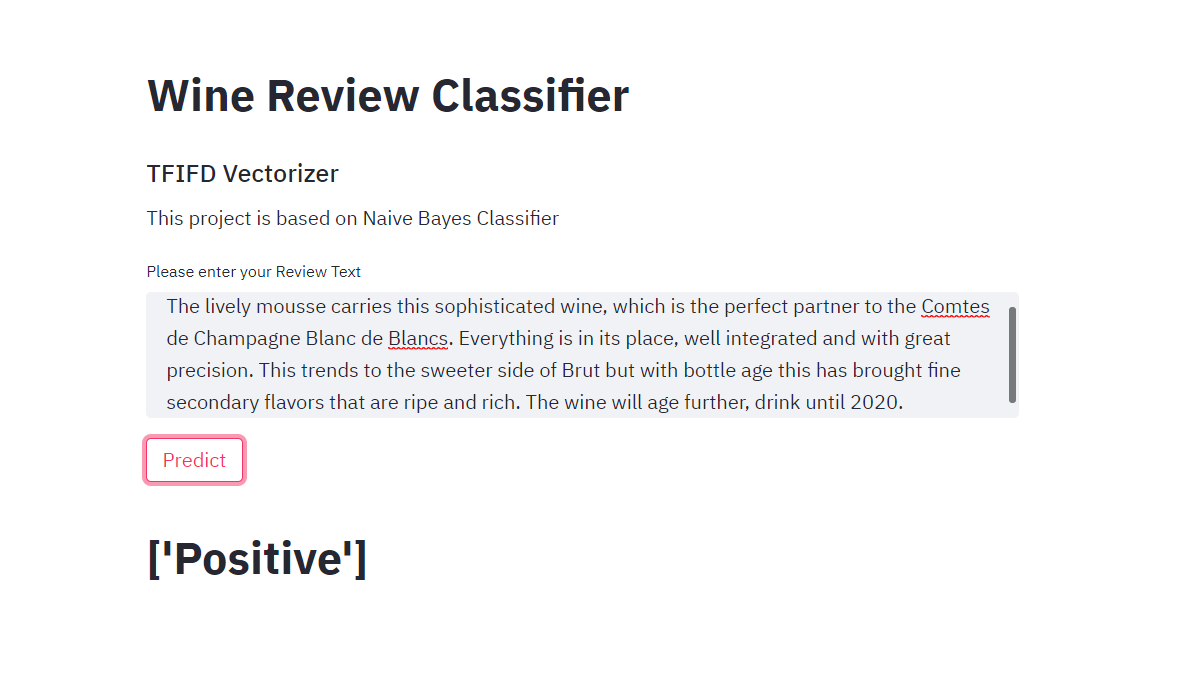

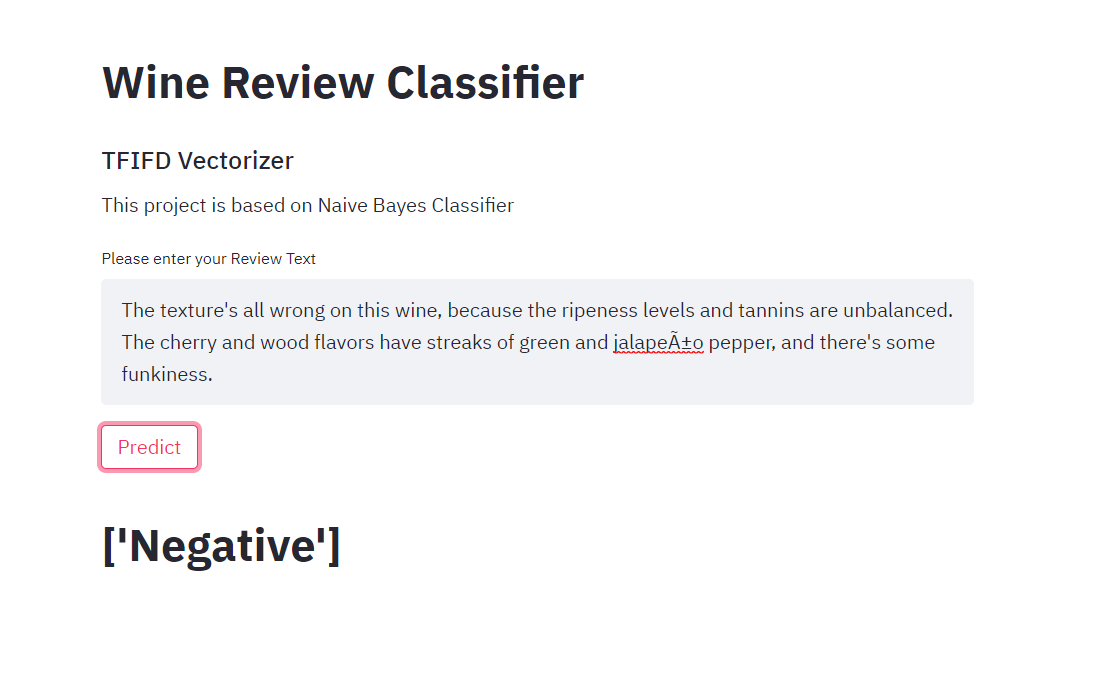